In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
#Read the data
toyota_corolla = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
toyota_corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### Lets remove the unnecessary columns and keep the one required for the regression calculation

In [4]:
# required columns: "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [5]:
toyota_corolla.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [6]:
TC = toyota_corolla.drop(['Id', 'Model', 'Mfg_Month', 'Mfg_Year',
       'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
       'Cylinders', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'], axis=1)

In [7]:
TC.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
#Data Structure
TC.shape

(1436, 9)

### Rename the columns

In [9]:
tc = TC.rename(columns = {'Age_08_04':'Age', 'Quarterly_Tax':'QTax'})
tc.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Checking for non null values and data type

In [10]:
tc.info() #no-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QTax    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [11]:
tc.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### checking for duplicates

In [12]:
tc[tc.duplicated()].shape

(1, 9)

In [13]:
tc[tc.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [14]:
# dropping the row 113 as its a duplicate row
tc1 =tc.drop([113],axis=0)

In [15]:
tc1 = tc1.reset_index()
tc1.head()

,index,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [16]:
tc1 = tc1.drop(['index'],axis =1)
tc1

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [17]:
tc1.shape

(1435, 9)

### calculating the correlation

In [18]:
tc1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QTax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


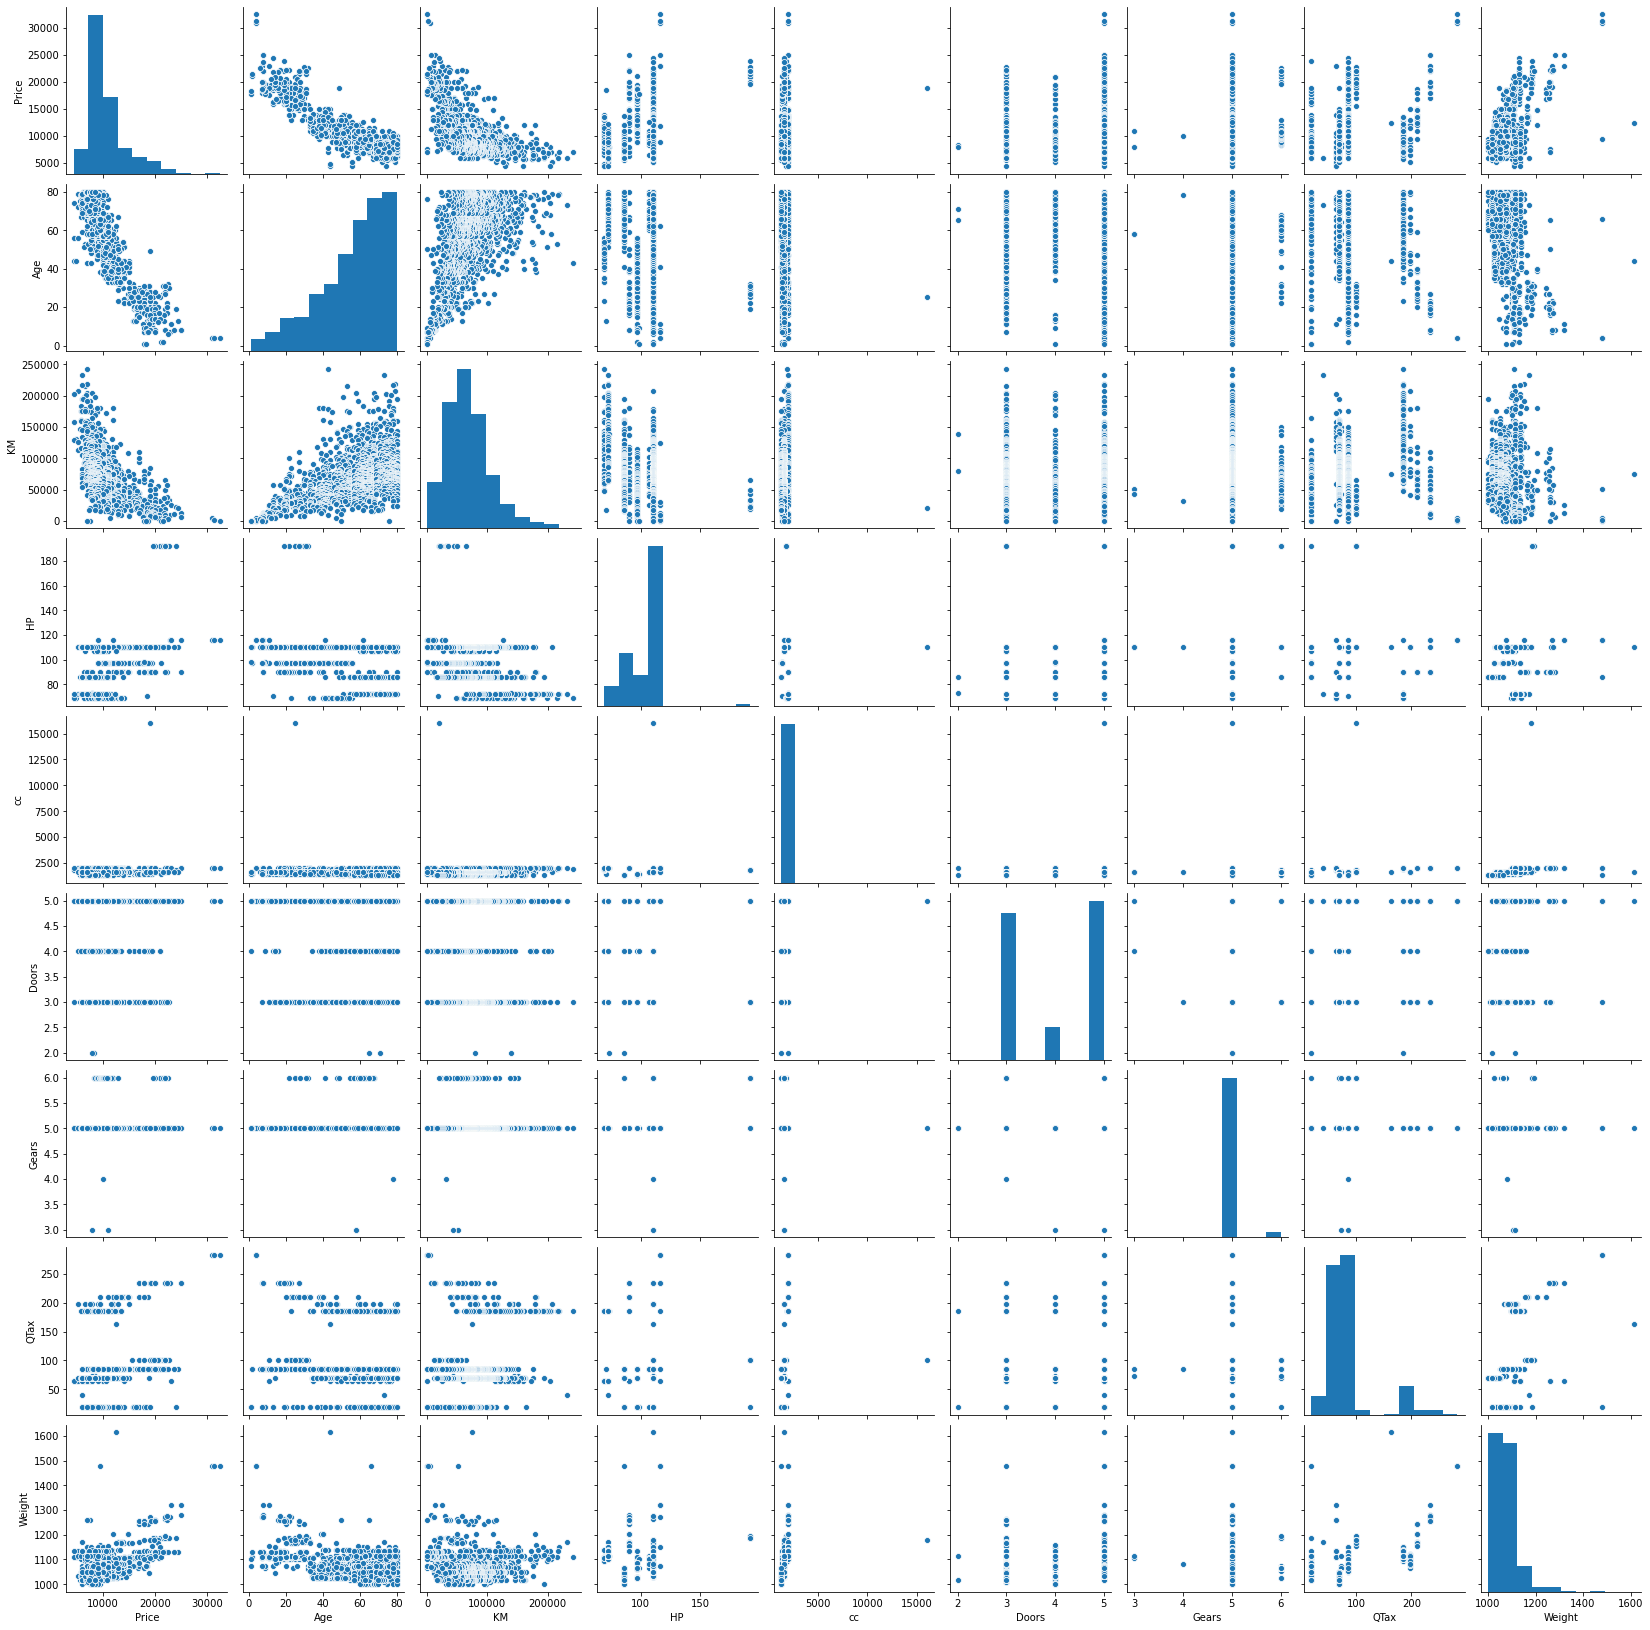

In [19]:
sns.pairplot (data=tc1)

## Building model

In [20]:
model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit()

In [21]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:29:56   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QTax           3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model1.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QTax            3.858805
Weight         16.855470
dtype: float64

In [23]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
cc           -1.316436
Doors        -0.023012
Gears         3.034563
QTax          2.944198
Weight       15.760663
dtype: float64 
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
cc            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QTax          3.290363e-03
Weight        1.031118e-51
dtype: float64


In [24]:
(model1.rsquared,model1.rsquared_adj)

(0.8625200256947, 0.8617487495415146)

### Calculating VIF to check colinearity factor

In [25]:
rsq_Age = smf.ols('Age~KM+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+HP+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age+KM+cc+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age+KM+HP+Doors+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Doors = smf.ols('Doors~Age+KM+HP+cc+Gears+QTax+Weight',data=tc1).fit().rsquared  
vif_Doors = 1/(1-rsq_Doors) 

rsq_Gears = smf.ols('Gears~Age+KM+HP+cc+Doors+QTax+Weight',data=tc1).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_QTax = smf.ols('QTax~Age+KM+HP+cc+Doors+Gears+Weight',data=tc1).fit().rsquared  
vif_QTax = 1/(1-rsq_QTax) 

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QTax',data=tc1).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 


d1 = {'Variables':['Age','KM','HP','cc','Doors','Gears','QTax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QTax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QTax,2.295375
7,Weight,2.487180


In [26]:
# All VIF values are less than 20, there are no colinear variables

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

In [27]:
# Q-Q plot for checking the normality of residuals
#y^-y (for each data point what is the diff btw predicted and actual value)

#model1.resid

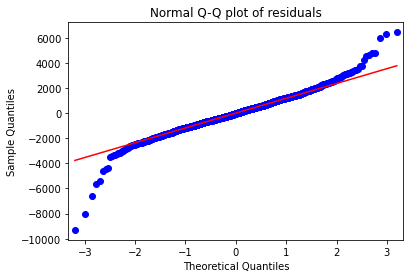

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
# this will tell us what is the index position of model.resid points which are less than -6000
list(np.where(model1.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [30]:
# QQ plot shows couple of outliers on both the sides, which we will confirm later using cook's distance technique

### Residual Plot for Homoscedasticity

In [31]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

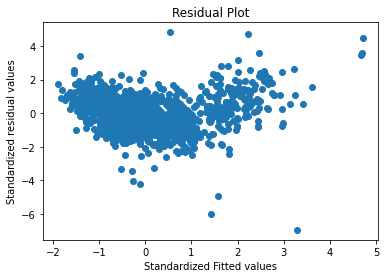

In [32]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

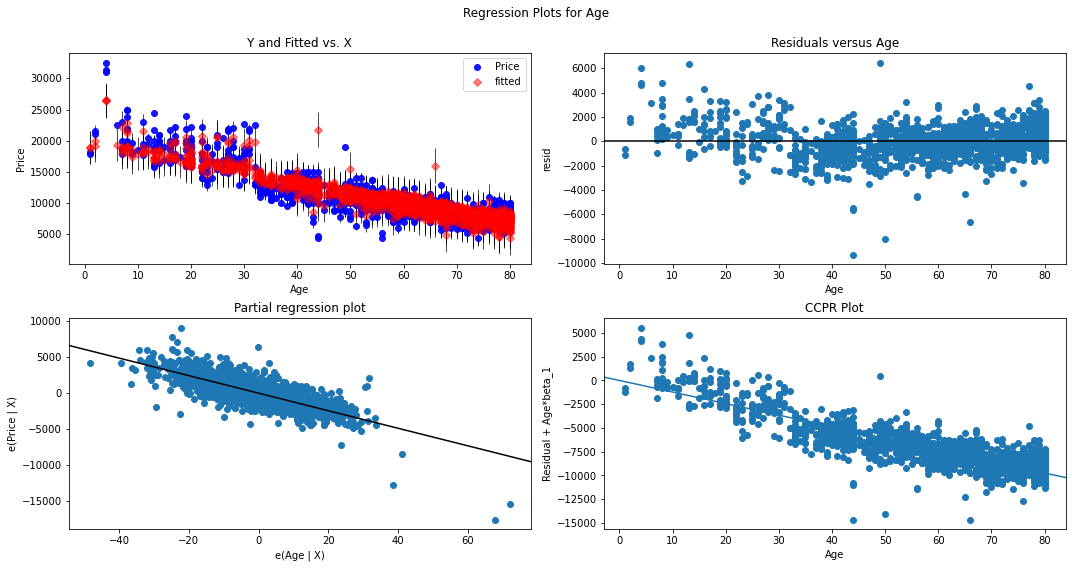

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Age", fig=fig)
plt.show()

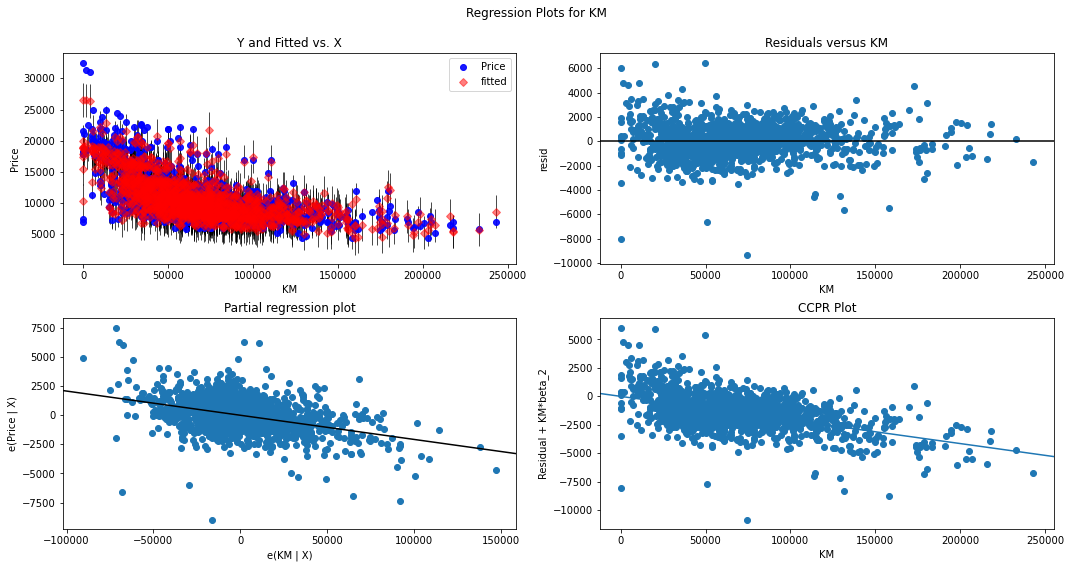

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "KM", fig=fig)
plt.show()

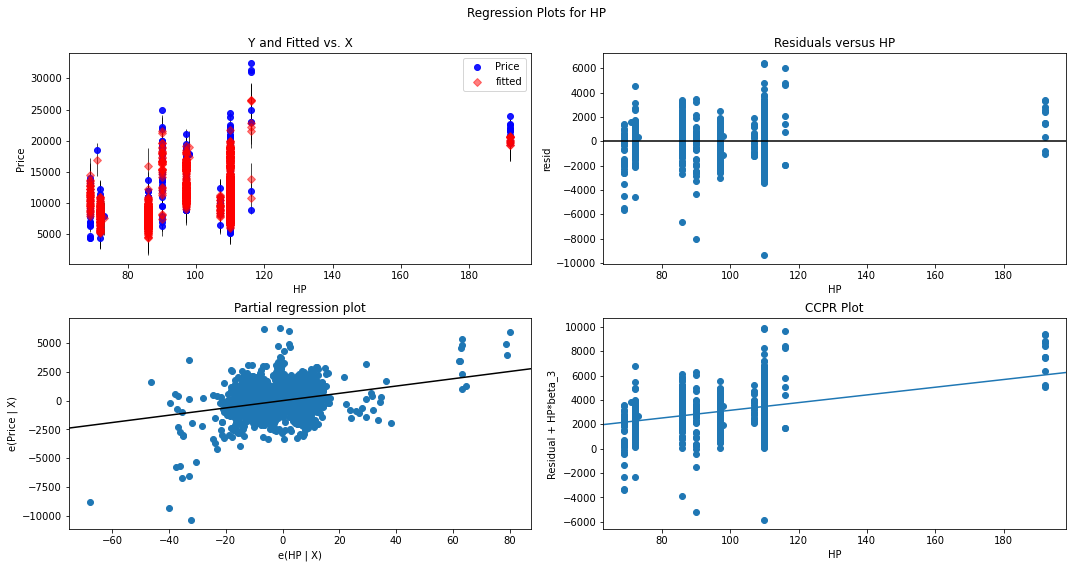

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "HP", fig=fig)
plt.show()

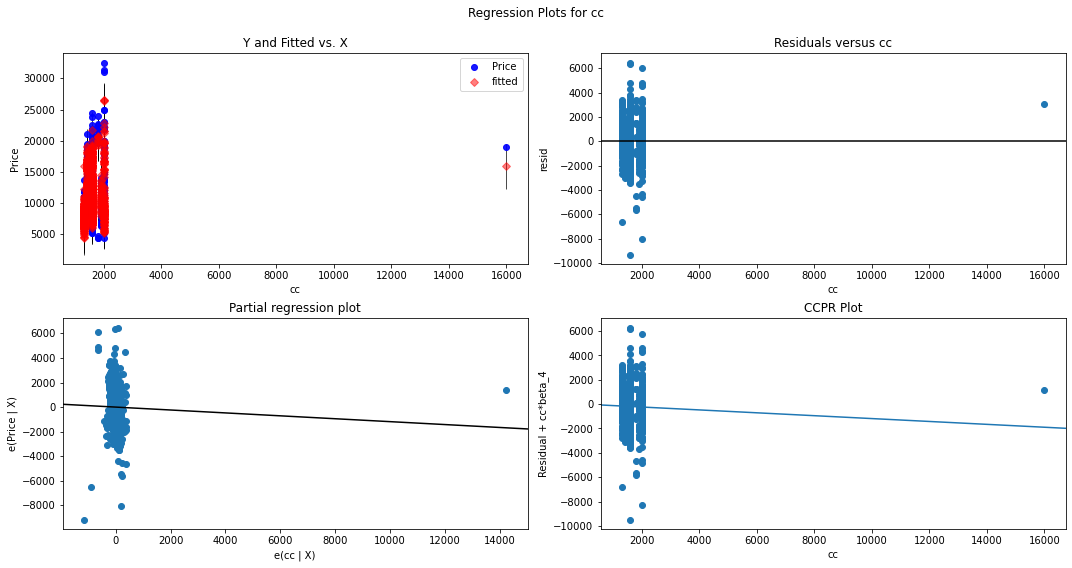

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "cc", fig=fig)
plt.show()

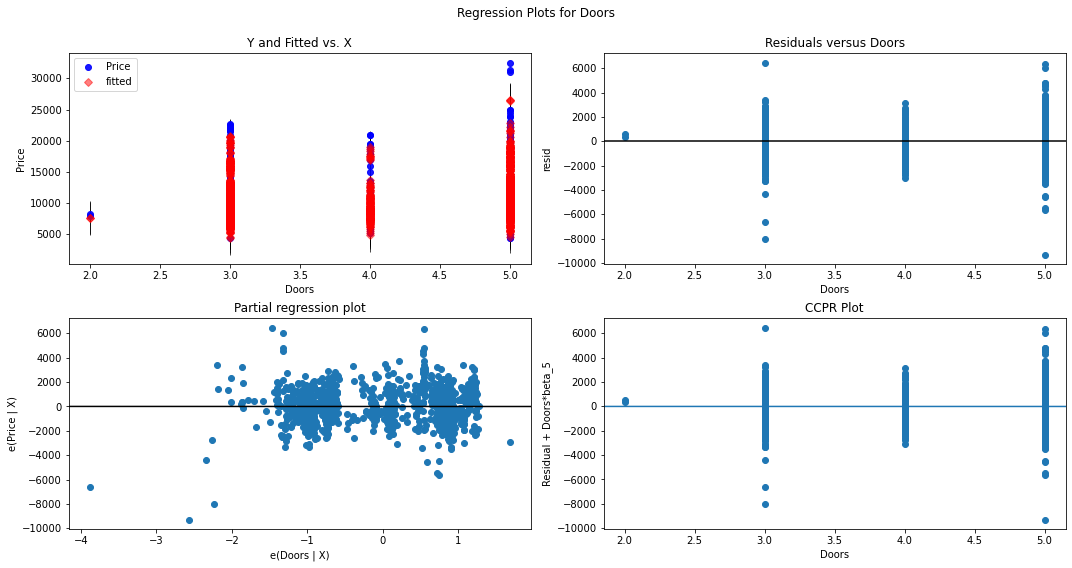

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Doors", fig=fig)
plt.show()

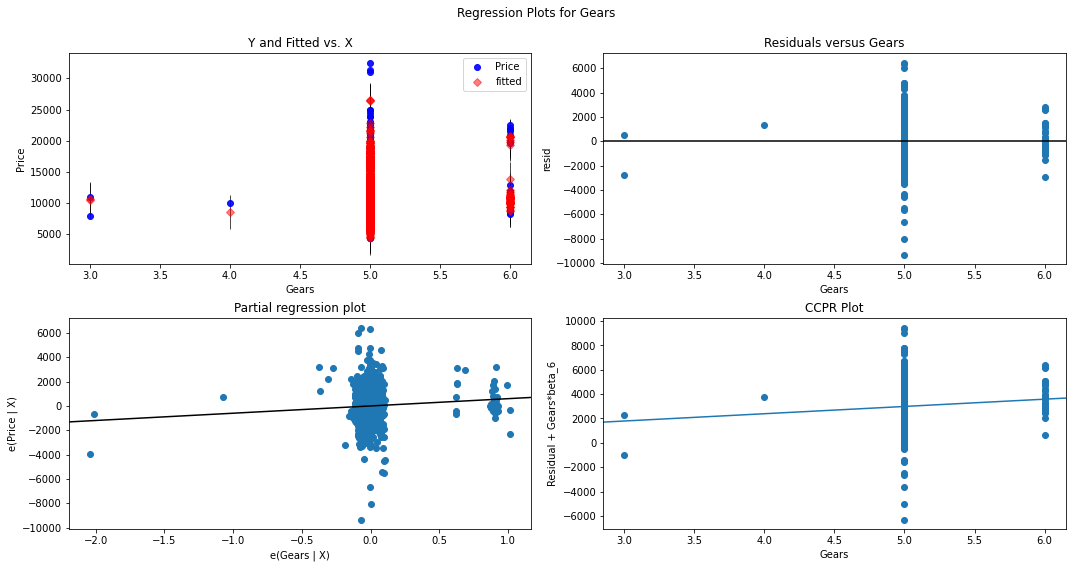

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Gears", fig=fig)
plt.show()

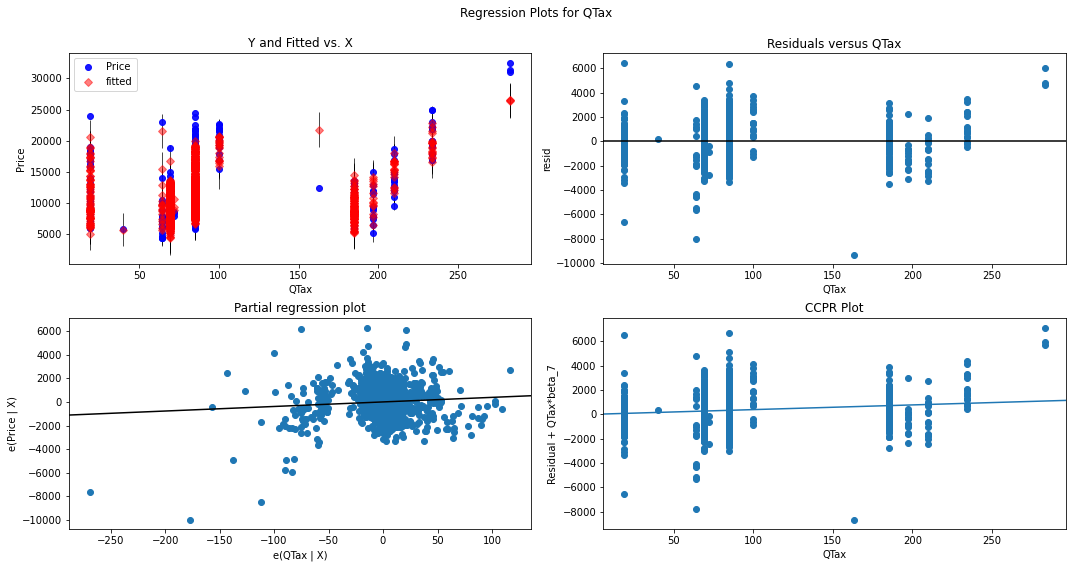

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "QTax", fig=fig)
plt.show()

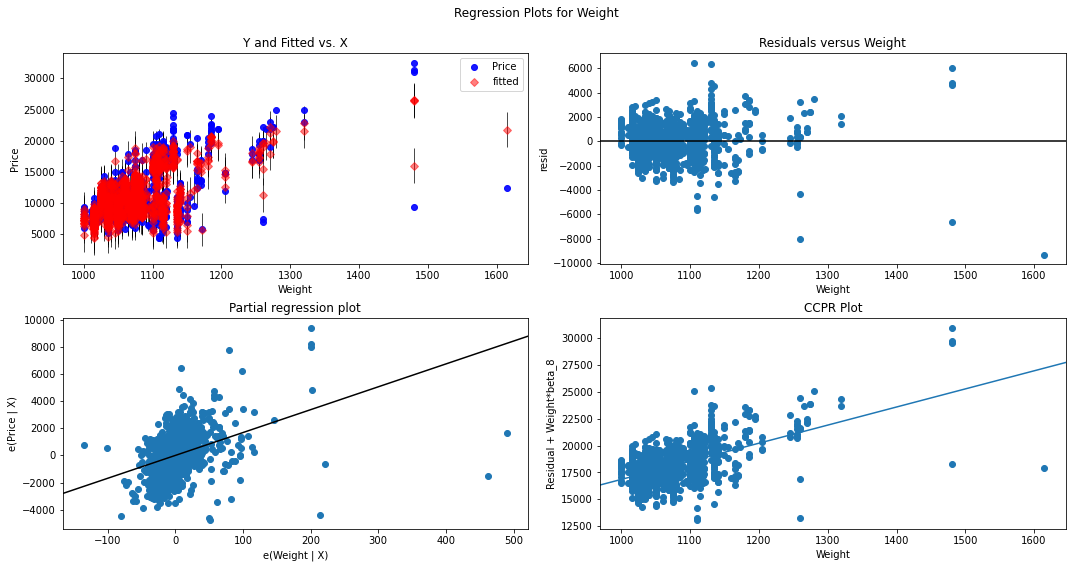

In [40]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "Weight", fig=fig)
plt.show()

### Model Deletion Diagnostics-Detecting Influencers/Outliers( Cook’s Distance)¶

### Iteration -2

In [41]:
# Identifying the outliers to make the model better using cook's distance technique
model_influence = model1.get_influence()
(c, _) = model_influence.cooks_distance

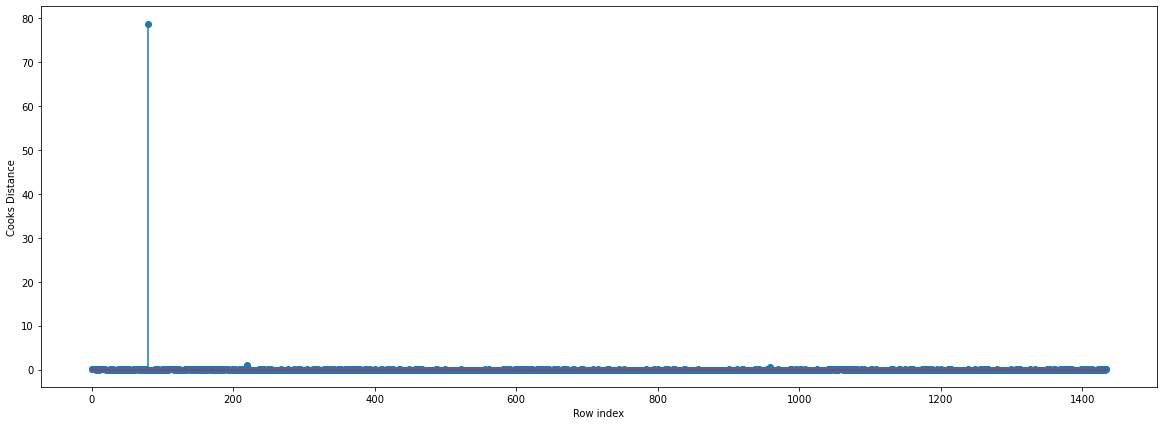

In [42]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(80, 78.7295058224916)

In [44]:
tc2 = tc1.drop([80],axis=0).reset_index()

In [45]:
tc2 = tc2.drop(['index'],axis=1)
tc2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [46]:
model2 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc2).fit()

In [47]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:30:18   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
cc            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QTax           8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
(model2.rsquared,model2.rsquared_adj)

(0.8681163912634053, 0.867375992056463)

### Iteration -3

In [49]:
# model3
model_influence = model2.get_influence()
(c, _) = model_influence.cooks_distance

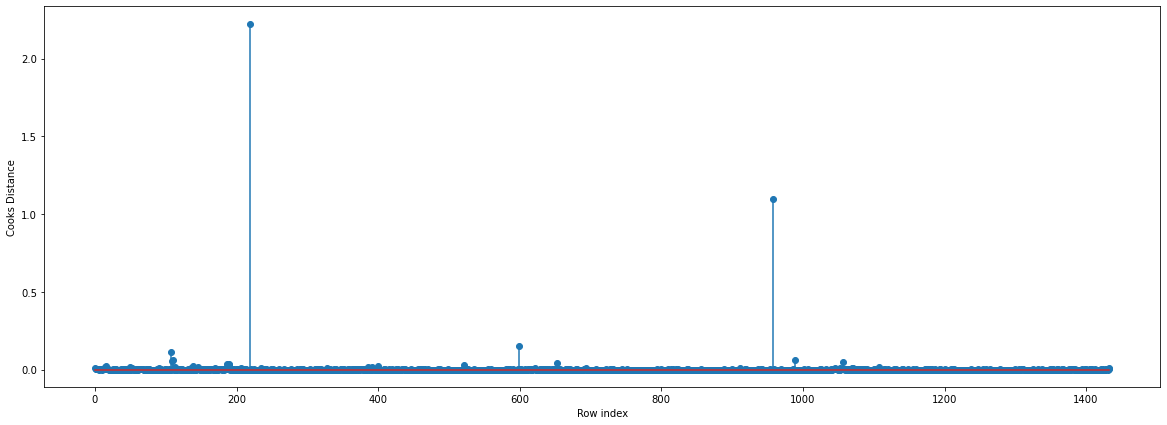

In [50]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
(np.argmax(c),np.max(c))

(219, 2.2253513655270813)

In [52]:
tc3 = tc2.drop([219],axis=0).reset_index()

In [53]:
tc3 = tc3.drop(['index'],axis=1)
tc3.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [54]:
model3 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc3).fit()

In [55]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:30:23   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
Age         -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM            -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP            39.2081      2.818     13.916      0.000      33.681      44.735
cc            -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors        -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears        487.4310    186.626      2.612      0.009     121.340     853.522
QTax           7.8987      1.384      5.706      0.000       5.183      10.614
Weight        24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
(model3.rsquared,model3.rsquared_adj)

(0.8765926307402282, 0.8758993309129262)

### Iteration -4

In [57]:
model_influence = model3.get_influence() 
(c, _) = model_influence.cooks_distance

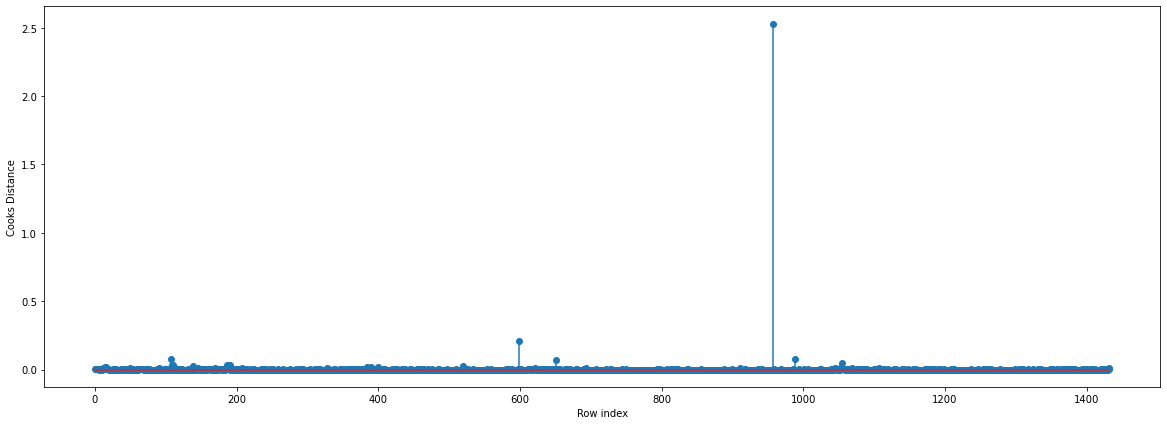

In [58]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
(np.argmax(c),np.max(c))

(957, 2.530779623276654)

In [60]:
tc4 = tc3.drop([957],axis=0).reset_index()

In [61]:
tc4 = tc4.drop(['index'],axis=1)
tc4.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [62]:
model4 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc4).fit()

In [63]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:30:29   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP            36.5587      2.747     13.308      0.000      31.170      41.947
cc            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears        466.6014    181.031      2.577      0.010     111.485     821.718
QTax           5.1754      1.373      3.770      0.000       2.482       7.869
Weight        30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
(model4.rsquared,model4.rsquared_adj)

(0.8839684606741538, 0.8833161400033128)

### Iteration - 5

In [65]:
model_influence = model4.get_influence() 
(c, _) = model_influence.cooks_distance

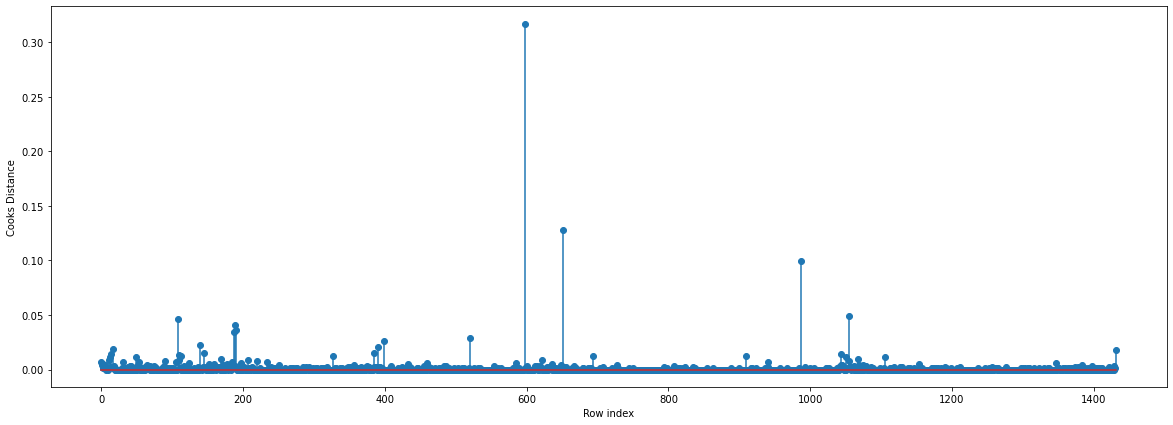

In [66]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [67]:
(np.argmax(c),np.max(c))

(598, 0.31689035401452564)

In [68]:
tc5 = tc4.drop([598],axis=0).reset_index()

In [69]:
tc5 = tc5.drop(['index'],axis=1)
tc5.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [70]:
model5 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc5).fit()

In [71]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:30:34   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age         -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM            -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP            34.2632      2.714     12.625      0.000      28.940      39.587
cc            -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors       -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears        469.5788    177.682      2.643      0.008     121.033     818.125
QTax           3.6472      1.363      2.676      0.008       0.973       6.321
Weight        32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
(model5.rsquared,model5.rsquared_adj)

(0.8882395145171204, 0.8876107635439396)

### Iteration - 6

In [73]:
model_influence = model5.get_influence() 
(c, _) = model_influence.cooks_distance

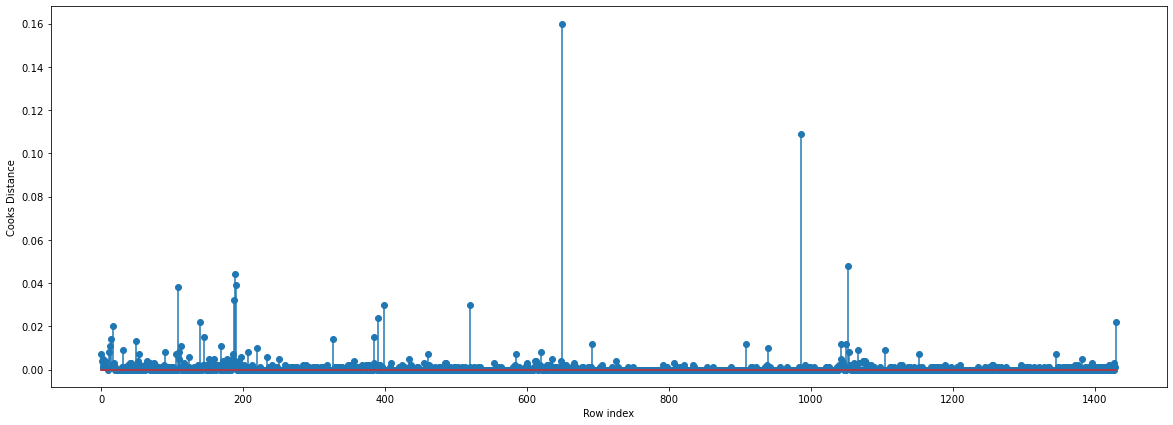

In [74]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [75]:
(np.argmax(c),np.max(c))

(650, 0.16028069686041221)

In [76]:
tc6 = tc5.drop([650],axis=0).reset_index()

In [77]:
tc6 = tc6.drop(['index'],axis=1)
tc6.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [78]:
model6 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc6).fit()

In [79]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1441.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:30:39   Log-Likelihood:                -12161.
No. Observations:                1430   AIC:                         2.434e+04
Df Residuals:                    1421   BIC:                         2.439e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.726e+04   1426.767    -12.097      0.000   -2.01e+04   -1.45e+04
Age         -109.4344      2.430    -45.041      0.000    -114.201    -104.668
KM            -0.0176      0.001    -15.008      0.000      -0.020      -0.015
HP            33.0003      2.700     12.222      0.000      27.704      38.297
cc            -3.6590      0.295    -12.416      0.000      -4.237      -3.081
Doors       -160.8162     36.732     -4.378      0.000    -232.872     -88.761
Gears        463.0124    176.070      2.630      0.009     117.628     808.397
QTax           2.4608      1.370      1.797      0.073      -0.226       5.148
Weight        33.4197      1.301     25.693      0.000      30.868      35.971
==============================================================================
Omnibus:                       68.851   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.864
Skew:                           0.182   Prob(JB):                     1.78e-43
Kurtosis:                       4.781   Cond. No.                     3.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
(model6.rsquared,model6.rsquared_adj)

(0.8902571486612915, 0.8896393141709962)

In [81]:
# As we are seeing improvement with every data point removal, we will still continue with the same till the time we stop seeing improvement or data does not have any other outlier

### Iteration - 7

In [82]:
model_influence = model6.get_influence() 
(c, _) = model_influence.cooks_distance

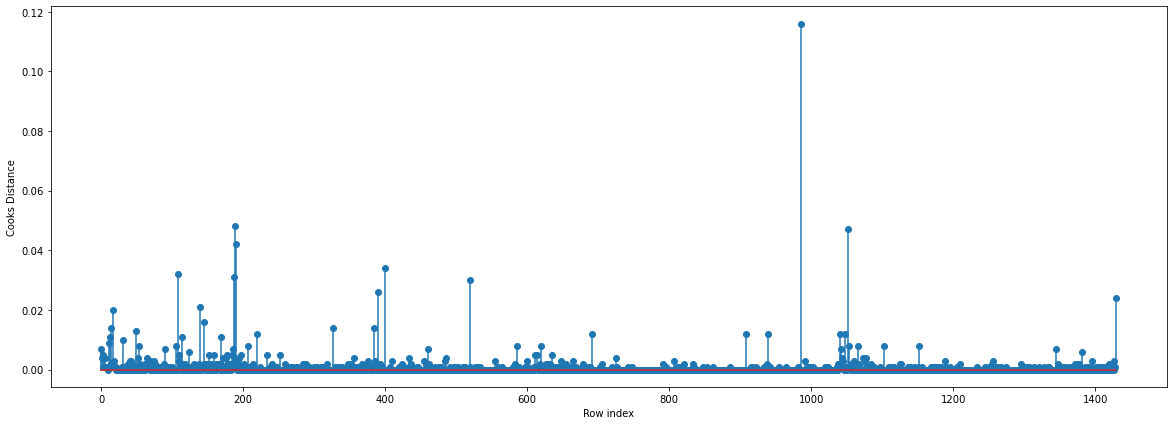

In [83]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
(np.argmax(c),np.max(c))

(985, 0.11627991877786244)

In [92]:
tc7 = tc6.drop([985],axis=0).reset_index()

In [93]:
tc7 = tc7.drop(['index'],axis=1)
tc7.head()

,Price,Age,KM,HP,cc,Doors,Gears,QTax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [94]:
model7 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QTax+Weight',data=tc7).fit()

In [95]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1451.
Date:                Fri, 11 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:34:39   Log-Likelihood:                -12148.
No. Observations:                1429   AIC:                         2.431e+04
Df Residuals:                    1420   BIC:                         2.436e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.663e+04   1435.694    -11.587      0.000   -1.95e+04   -1.38e+04
Age         -109.1772      2.423    -45.054      0.000    -113.931    -104.424
KM            -0.0176      0.001    -15.036      0.000      -0.020      -0.015
HP            33.5764      2.698     12.447      0.000      28.285      38.868
cc            -3.6793      0.294    -12.522      0.000      -4.256      -3.103
Doors       -169.9445     36.727     -4.627      0.000    -241.990     -97.899
Gears        286.6019    184.057      1.557      0.120     -74.451     647.655
QTax           2.4018      1.365      1.759      0.079      -0.277       5.080
Weight        33.6664      1.299     25.919      0.000      31.118      36.214
==============================================================================
Omnibus:                       69.786   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.649
Skew:                           0.196   Prob(JB):                     1.99e-43
Kurtosis:                       4.774   Cond. No.                     3.57e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
(model7.rsquared,model7.rsquared_adj)

(0.8909888960319987, 0.8903747489673902)

### Iteration - 8

In [97]:
model_influence = model7.get_influence() 
(c, _) = model_influence.cooks_distance

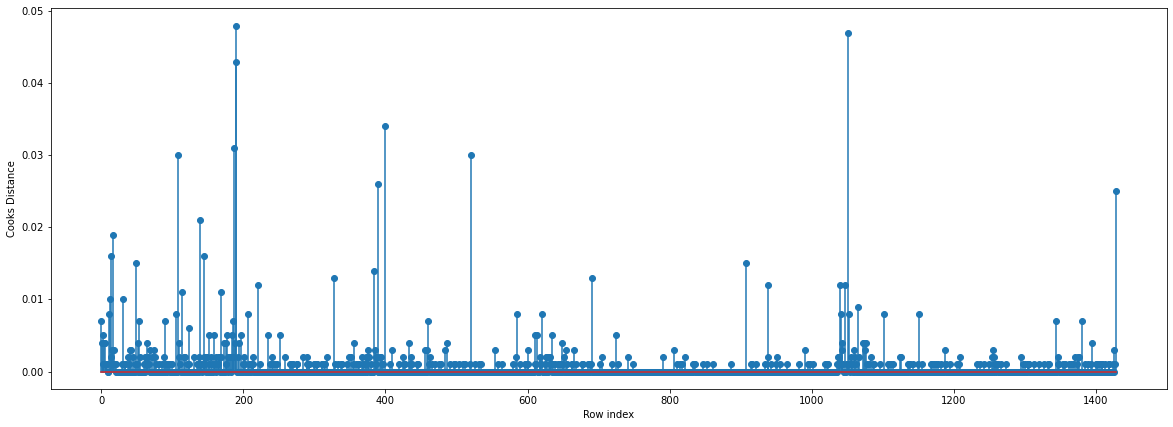

In [98]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tc7)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Since all the values fall under 0.05 and many values fall within the same range, we will stop the outlier removal process here
# We can consider Model 7 as the final model and use the regression equation for future estimates.

### Checking the model by predicting the price of the same data set and comparing it with actual values

In [99]:
pred_price = pd.DataFrame (model7.predict(tc7), columns=['Predict_Price'])

In [100]:
pred_price.head()

,Predict_Price
0,16341.105289
1,15885.384177
2,16324.561426
3,15995.766877
4,15894.217599


In [102]:
Actual_Price = tc7['Price']

In [104]:
pred_price1 = pd.concat([Actual_Price, pred_price], axis=1)
pred_price1.head()

,Price,Predict_Price
0,13500,16341.105289
1,13750,15885.384177
2,13950,16324.561426
3,14950,15995.766877
4,13750,15894.217599


In [105]:
Error = pd.DataFrame (((pred_price1['Predict_Price']- pred_price1['Price'])/pred_price1['Price']), columns=['Error'])

In [106]:
result = pd.concat ([pred_price1, Error], axis=1)

In [108]:
result.head()

,Price,Predict_Price,Error
0,13500,16341.105289,0.210452
1,13750,15885.384177,0.155301
2,13950,16324.561426,0.170219
3,14950,15995.766877,0.069951
4,13750,15894.217599,0.155943


In [109]:
result.style.format({'Price': "{:.2f}",'Predict_Price': "{:.2f}",'Error': "{:.2%}"})

,Price,Predict_Price,Error
0,13500.00,16341.11,21.05%
1,13750.00,15885.38,15.53%
2,13950.00,16324.56,17.02%
3,14950.00,15995.77,7.00%
4,13750.00,15894.22,15.59%
5,12950.00,15280.74,18.00%
6,16900.00,17761.35,5.10%
7,18600.00,17762.61,-4.50%
8,21500.00,20953.35,-2.54%
9,12950.00,13499.78,4.25%


In [110]:
result.Error.mean()

0.010996858085408682

In [ ]:
# Since the mean of all the error values is close to 0, hence we can say regression equation for forecasting is working well.